In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
t, v1, v2 =np.loadtxt("C:\\Users\\gjc10\\Desktop\\3rd Year Labs\\Electronics Lab\\ex5+7\\scope_3.csv",delimiter=',',unpack=True,skiprows=3)

In [3]:
def expfn(t,tau,a):
    return a*np.exp(-t/tau)

Text(0.5, 1.0, 'Plot of Voltage against time in an RC circuit')

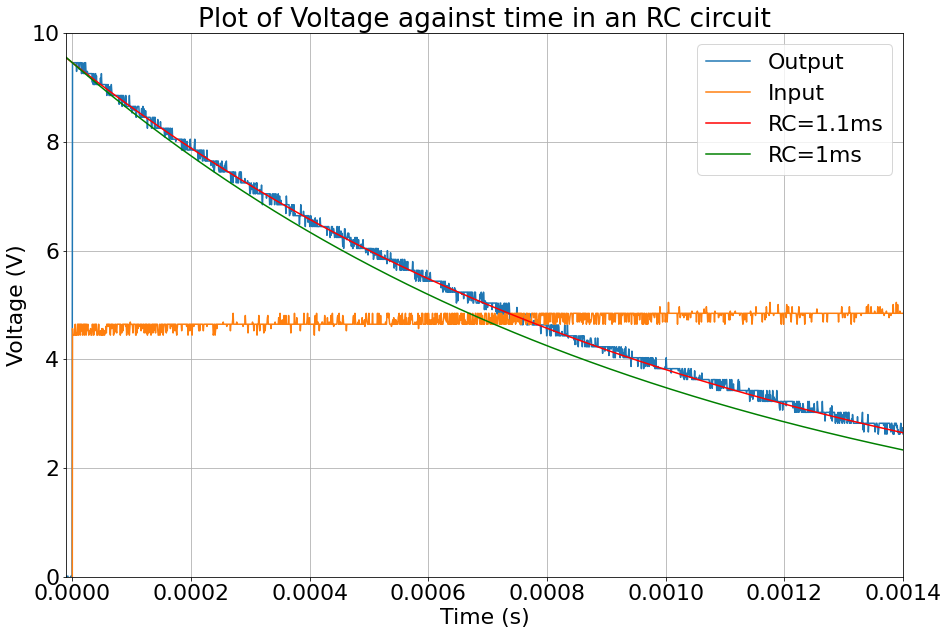

In [4]:
#Ex 5 code
plt.plot(t,v2)
plt.plot(t,v1)
#Note use of plot rather than scatter as high sampling rate allows for it
plt.plot(t-6.47e-7,9.46*np.exp((-t+6.47E-7)/(1.1E-3)),color='r')
plt.plot(t-6.47e-7,9.46*np.exp((-t+6.47E-7)/(1E-3)),color='green')
plt.xlim(-0.00001,0.0014)
plt.ylim(0,10)
plt.grid(True)
plt.legend(['Output','Input','RC=1.1ms','RC=1ms'])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Plot of Voltage against time in an RC circuit')

#the 6.47 part is just coming from the delay between measurement start and peak
#Note agreement at RC=1.1*10^-3 rather than 1*10^-3


[0.00111613]


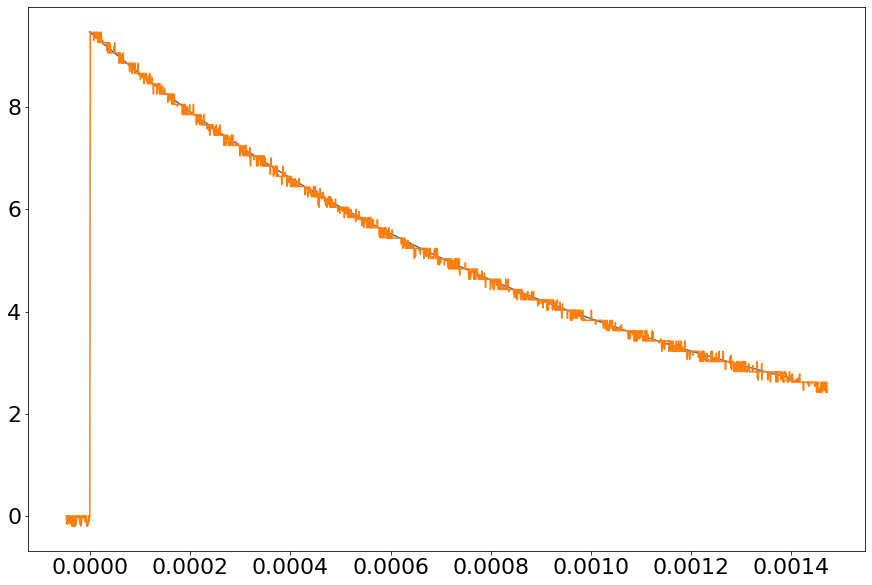

In [5]:
def RCfunc(t,tau):
    return 9.46*np.exp((-t+6.47e-7)/(tau))
answers,uncertainties=curve_fit(RCfunc,t,v2)
print(answers)
timespace=np.linspace(0,0.0014,1000)
plt.plot(timespace-6.47e-7,RCfunc(timespace,answers[0]))
plt.plot(t,v2)


In [6]:
#Ex 7
f1, Gain1, Phase1, =np.loadtxt("C:\\Users\\gjc10\Desktop\\Greg Corcoran Electronics\\ex7 bode.csv",delimiter=',',skiprows=1,
usecols=(1,3,4),unpack=True)
F=np.linspace(1,1000000,1000000)

OSError: C:\Users\gjc10\Desktop\Greg Corcoran Electronics\ex7 bode.csv not found.

In [ ]:
plt.scatter(f1,Phase1,color='r')
plt.xscale('log')
plt.plot(F,(180/np.pi)*np.arctan(1/(2*F*np.pi*1*10**(-3))))
plt.grid(True)
plt.xlabel('Frequency (hz)')
plt.ylabel('Phase (°)')
plt.legend(['Expected results','Measured Results'])
plt.title('Graph of frequency vs phase for an RC circuit')
plt.errorbar(f1,Phase1,yerr=0.5,fmt='o')

In [ ]:
plt.scatter(f1,Gain1,color='r')
plt.xscale('log')
plt.grid(True)
plt.plot(F,20*np.log10((2*np.pi*F*1*10**-3)/np.sqrt(1+(2*np.pi*F*1*10**-3)**2)))
plt.xlabel('Frequency (hz)')
plt.ylabel('Gain (dB)')
plt.legend(['Expected results','Measured Results'])
plt.title('Graph of frequency vs gain for an RC circuit')
plt.errorbar(f1,Gain1,yerr=0.1,fmt='o')

In [ ]:
f=np.array([10,100,1000,10000,100000,1000000])
Phase=np.array([83.4,55,6,0,3.5,0])
Amp=np.array([0.74,5.8,9.9,10,9.8,9.8])
dPhase=np.array([0.5,2,2,1,2,2])
dAmp=np.array([0.005,0.1,0.1,0.01,0.2,0.2])
plt.scatter(f,Phase)
plt.xscale('log')
plt.errorbar(f,Phase,yerr=dPhase,fmt='o')
plt.plot(F,(180/np.pi)*np.arctan(1/(2*F*np.pi*1.1*10**(-3))))
plt.plot(F,(180/np.pi)*np.arctan(1/(2*F*np.pi*1*10**(-3))))

In [ ]:
plt.scatter(f,Amp)
plt.errorbar(f,Amp,yerr=dAmp)
plt.xscale('log')
plt.yscale('log')
plt.plot(F,10*((F*1.1*10**-3)/np.sqrt(1+(F*1.1*10**-3)**2)))

In [ ]:
#ex12 IV curve
V=np.array([0,0.3,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3])
I=np.array([0,0,0,0.04,0.08,0.24,0.43,0.6,0.94,1.44,1.76,2.11,2.52,2.95,3.27,3.72,4.19,4.49])
plt.scatter(V,I)
plt.errorbar(V,I,xerr=0.05,yerr=0.02,fmt='o')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.grid(True)
plt.title('Measured I-V curve of 1N 4148 diode in forward bias')


In [ ]:
#ex12b cropping
t2,v3,v4 = np.loadtxt("C:\\Users\\gjc10\\Desktop\\ex12\\scope_1.csv",delimiter=',',unpack=True,skiprows=2)
plt.plot(t2,v3)
plt.plot(t2,v4)
plt.grid(True)
plt.xlabel('Time(s)')
plt.ylabel('Voltage (V)')
plt.legend(['Output','Input'])
plt.title('Oscilloscope Measurement of Sine wave through a 1N 4148 Diode')

In [ ]:
#ex12b rectification
t3, v5, v6 = np.loadtxt("C:\\Users\\gjc10\\Desktop\\ex12\\scope_1b.csv",delimiter=',',unpack=True,skiprows=2)
plt.plot(t3,-v5)
plt.plot(t3,-v6)
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend(['Input','Output'])
plt.title('Oscilliscope measurement of ex12 circuit with capacitor')
#Minus sign added just to make it easier to view


In [ ]:
#Ex19
I_b=np.array([42.75e-3,385e-3,206e-3,2.69,4.39e-3,4])
I_c=np.array([3.69,41.06,172.3e-3,261.18,206.12e-3,276.32])
plt.scatter(I_b,I_c,color='r')
I_fit=np.linspace(0,4,100)
plt.plot(I_fit,100*I_fit)
plt.plot(I_fit,20*I_fit)
plt.plot(I_fit,150*I_fit)
plt.xlabel('$I_{BE}$ (mA)')
plt.ylabel('$I_{CE}$ (mA)')
plt.grid(True)
plt.title('Plot of Collector and Base currents')
plt.legend(['$h_{fe}$=100','$h_{fe}$=20','$h_{fe}$=150','Measured Currents'])

In [ ]:
I_b1=np.array([42.75e-3,385e-3,4.39e-3])
I_c1=np.array([3.69,41.06,206.12e-3])
plt.scatter(I_b1,I_c1,color='r')
I_fit1=np.linspace(0,400e-3,100)
plt.plot(I_fit1,100*I_fit1)
plt.errorbar(I_b1,I_c1,xerr=0.005e-3,yerr=[0.01,0.01,0.01e-3],fmt='o',color='r')
plt.grid(True)
plt.xlabel('$I_{BE}$ (mA)')
plt.ylabel('$I_{CE}$ (mA)')
plt.title('Plot of base and collector currents for collector currents <100mA')
plt.legend(['$h_{fe}$=100','Measured Currents'])

In [ ]:
#Ex20
vi1,vo1,vi2,vo2,vi3,vo3,vi4,vo4,vi5,vo5=np.loadtxt("C:\\Users\\gjc10\\Desktop\\ex20v3.csv",delimiter=','\
,unpack=True,skiprows=1)
plt.plot(vi1,vo1)
plt.plot(vi2,vo2)
plt.plot(vi3,vo3)
plt.plot(vi4,vo4)
plt.plot(vi5,vo5)
plt.xlabel('$V_{in}$ (V)')
plt.ylabel('$V_{Out}$ (V)')
plt.grid(True)
plt.legend(['$R_{L}=10\Omega$','$R_{L}=100\Omega$','$R_{L}=1K\Omega$','$R_{L}=10K\Omega$','$R_{L}=100K\Omega$'])
plt.title('Plot of input and output voltages from exercise 20')

In [ ]:
#Ex25
f2,g2,p2=np.loadtxt("C:\\Users\\gjc10\\Desktop\\Greg Corcoran Electronics\\ex25frap1v2.csv",unpack=True,\
skiprows=1,usecols=(1,3,4),delimiter=',')
fig, ax1=plt.subplots()
ax1.set_xlabel('Frequency(hz)')
ax1.set_xscale('log')
ax1.set_ylabel('Gain(dB)',color='blue')
ax1.grid(True)
plt.title('Frequency response of non-inverting op amp circuit used in exercise 25')
ax1.scatter(f2,g2,color='blue')
ax2=ax1.twinx()
ax2.set_ylabel('Phase Angle (°)',color='r')
ax2.scatter(f2,p2,color='r')

In [ ]:
f3,g3,p3=np.loadtxt("C:\\Users\\gjc10\\Desktop\\Greg Corcoran Electronics\\ex25p2.csv",unpack=True,\
skiprows=1,usecols=(1,3,4),delimiter=',')
fig, ax3=plt.subplots()
ax3.set_xlabel('Frequency(hz)')
ax3.set_xscale('log')
ax3.set_ylabel('Gain(dB)',color='blue')
ax3.grid(True)
plt.title('Frequency response of non-inverting op amp circuit with feedback capacitor')
ax3.scatter(f3,g3,color='blue')
ax4=ax3.twinx()
ax4.set_ylabel('Phase Angle (°)',color='r')
ax4.scatter(f3,p3,color='r')